# Practical Implimantations Of Simple Linear Regression

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline

In [3]:
df=pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

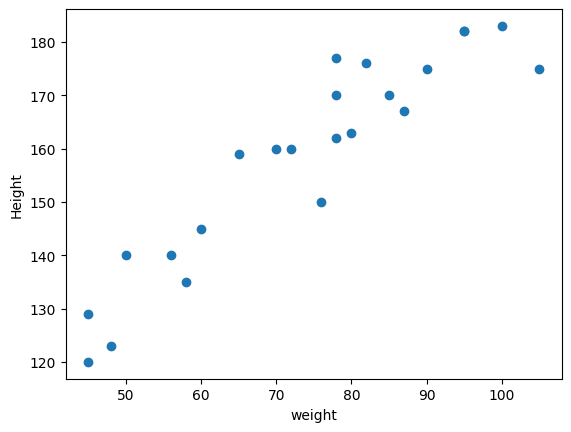

In [5]:
## Scatter Plots 
plt.scatter(df.Weight,df.Height)
plt.xlabel("weight")
plt.ylabel("Height")

In [6]:
# Finding Corellation 
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


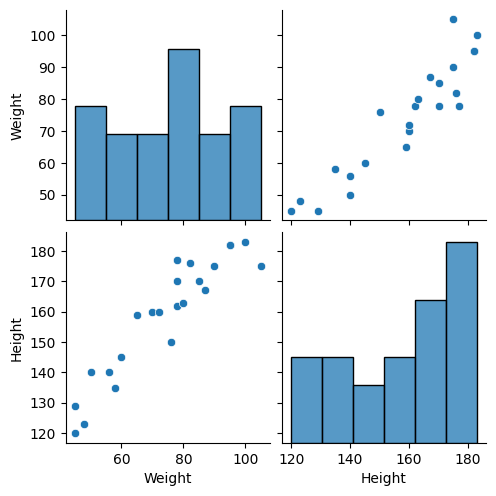

In [7]:
import seaborn as sns

## Seaborn Visualization 
sns.pairplot(df)

In [8]:
# Features Independent and Dependent Features
# x=independent Feature should be in the form DataFrame or it should be the two dimentional array.
X=df[["Weight"]]
Y=df["Height"] # Dependent Feature Can Be in the 1D array 

In [9]:
np.array(X).shape
print("X Value",X)
print("T value",Y)

X Value     Weight
0       45
1       58
2       48
3       60
4       70
5       78
6       80
7       90
8       95
9       78
10      82
11      95
12     105
13     100
14      85
15      78
16      50
17      65
18      76
19      87
20      45
21      56
22      72
T value 0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64


In [10]:
# Now testing the Data into train and test split

from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train, Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [12]:
X_test.shape

(6, 1)

In [13]:
# STANDARDIZATION 
from sklearn.preprocessing import StandardScaler

In [14]:
standard_scaler=StandardScaler()
X_train=standard_scaler.fit_transform(X_train)
X_test=standard_scaler.transform(X_test)
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [15]:
from sklearn.linear_model import LinearRegression # Sklearn provides us the LinearRegression Package to implement directly 

In [16]:
regression=LinearRegression()

In [17]:
regression.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
regression

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
print("Coefficient or Slope ",regression.coef_)  # for the simple linear regression the equation is Y=Bo+BiXi(Xi are the data points here)
print("Intercept value is ",regression.intercept_)

Coefficient or Slope  [17.2982057]
Intercept value is  156.47058823529412


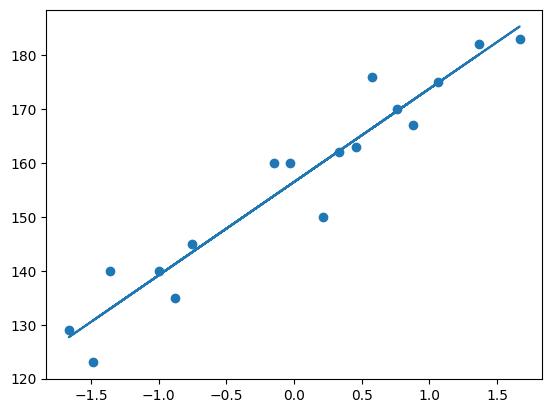

In [20]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

# Prediction Of Test Data
1. predectited Height output=intercept+coeff(x_test)
2. y_pred=156.47058823529412+17.2982057(X_test)

In [21]:
y_pred=regression.predict(X_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

# Performance Metrics

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print("your mean squared error is",mse)
print("your mean absolute error is",mae)
print("your root mean squared error is",rmse)

your mean squared error is 114.84069295228699
your mean absolute error is 9.66512588679501
your root mean squared error is 10.716374991212605


# R Square 
R^2=Formula 
1-ssr/sst
R^2 coefficient of determination ssr=sum of squares of residuals sst=total sum of squares

In [24]:
from sklearn.metrics import r2_score 
r_square_score=r2_score(Y_test
,y_pred)
print("your r square score is that ",r_square_score)


your r square score is that  0.7360826717981276


# The Adjusted R² formula is:

Radj2=1−((1−R2)(n−1)n−p−1)
R
adj
2
	​

=1−(
n−p−1
(1−R
2
)(n−1)
	​

)

Where:

R2
R
2
 = coefficient of determination (regular R-squared)

n
n = number of observations (samples)

p
p = number of predictors (independent variables) in the model

🔎 Intuition:

Ordinary 
R2
R
2
 always increases when you add more predictors, even if they don’t help.

Adjusted 
R2
R
2
 adds a penalty for adding irrelevant predictors, so it only increases if the new variable improves the model more than expected by chance.

In [25]:
adj_r2=1-(r_square_score)*(len(X_test)-1)/len(Y_test)-X_test.shape[1]-1

In [26]:
print("adjusted r square value is that ",adj_r2)

adjusted r square value is that  -1.6134022264984398


# Predection Of New Data

In [27]:
regression.predict(standard_scaler.transform([[72]]))

/opt/anaconda3/envs/ai-venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])